In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tslearn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 10.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from matplotlib import cm


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.manifold import TSNE
from tslearn.neighbors import KNeighborsTimeSeriesClassifier


import tensorflow as tf

from tslearn.utils import ts_size
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict

## Cargar los datos y grafico inicial

In [ ]:
data = arff.loadarff("/content/drive/MyDrive/MasterKISA/ITSDA/Entrega2/MoteStrain.arff")
df = pd.DataFrame(data[0])

print(df.head())

       att1      att2      att3      att4      att5      att6      att7  \
0  0.398150  0.503921  0.525904  0.607302  0.572887  0.804101  0.721741   
1 -1.094367 -1.251307 -1.417703 -1.501493 -1.354483 -1.193750 -1.036556   
2  0.081700  0.057580  0.019309 -0.017998 -0.045013 -0.058199 -0.122842   
3 -1.425477 -1.451659 -1.486758 -1.535277 -1.558609 -1.582891 -1.620021   
4 -0.500857 -0.529616 -0.569820 -0.624989 -0.678105 -0.712733 -0.744573   

       att8      att9     att10  ...     att76     att77     att78     att79  \
0  0.688301 -0.419047 -0.853946  ... -0.105779  0.020968  0.108770  0.130787   
1 -0.804107 -0.760073 -0.489427  ... -0.716078 -0.635516 -0.431121 -0.254227   
2 -0.421939 -0.412290 -0.304506  ... -0.385918  0.025096  0.192977  0.221922   
3 -1.602121 -1.518666 -1.331724  ... -0.900335  0.190807  0.708513  0.192089   
4 -0.769077 -0.799596 -0.822486  ... -0.793140 -0.799009  0.200505  0.513916   

      att80     att81     att82     att83     att84  target  
0  0.1

In [ ]:
clases = df.iloc[:, -1]
clases.value_counts()

,count
target,
b'1',685
b'2',587


In [ ]:
X = df.drop(columns=['target']).values
y = pd.Categorical(df['target']).codes

X = X.reshape(X.shape[0], X.shape[1], 1)
# División estratificada en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar las proporciones
print("Distribución en y_train:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribución en y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

Distribución en y_train:
0    0.53884
1    0.46116
Name: proportion, dtype: float64

Distribución en y_test:
0    0.537255
1    0.462745
Name: proportion, dtype: float64


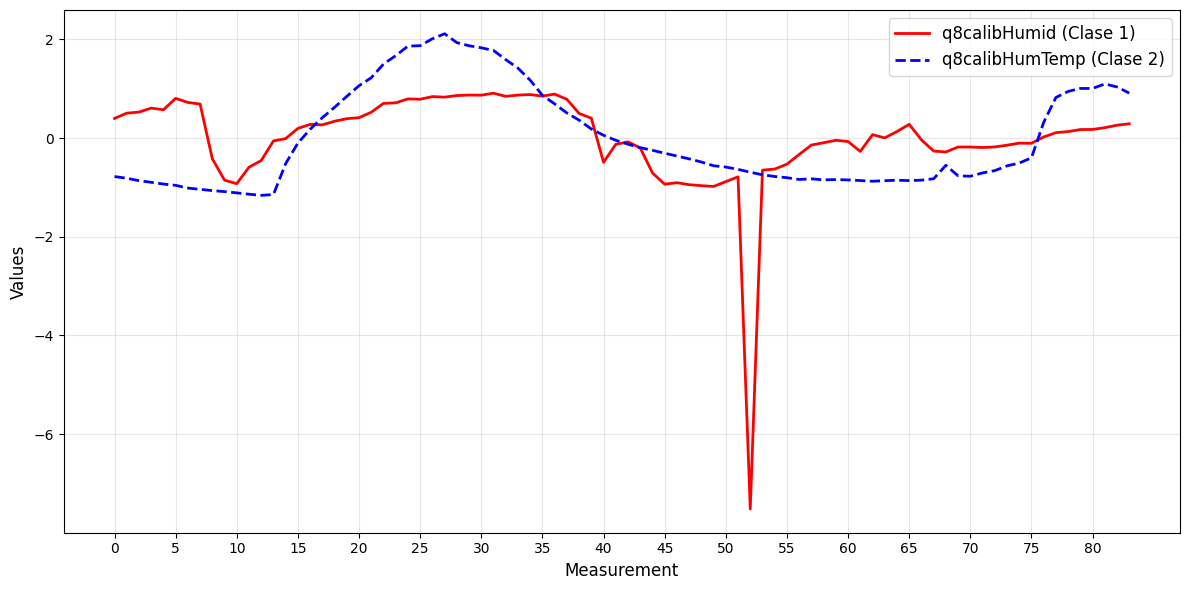

In [ ]:
# Extraer la primera fila y los nombres de las columnas
row0 = df.iloc[0]
row1 = df.iloc[400]
class_label0 = row0.iloc[-1]  # Última columna (la clase)
values0 = row0.iloc[:-1]  # Todas las columnas excepto la última
class_label1 = row1.iloc[-1]  # Última columna (la clase)
values1 = row1.iloc[:-1]  # Todas las columnas excepto la última

# Crear el gráfico
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
plt.plot(values0, color='red', label="q8calibHumid (Clase 1)", linewidth=2, linestyle='-')
plt.plot(values1, color='blue', label="q8calibHumTemp (Clase 2)", linewidth=2, linestyle='--')

# Configurar etiquetas del eje X
ticks = range(0, len(values0), 5)  # Crear ticks de 5 en 5
plt.xticks(ticks, labels=ticks, fontsize=10)  # Etiquetas de ticks de 5 en 5

# Añadir título y etiquetas
plt.xlabel("Measurement", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Añadir leyenda y cuadrícula
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## 1-KNN with DTW

In [ ]:
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
knn_dtw.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn_dtw.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KNeighborsTimeSeriesClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KNeighborsTimeSeriesClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEs

Accuracy: 0.9568627450980393

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       137
           1       0.97      0.94      0.95       118

    accuracy                           0.96       255
   macro avg       0.96      0.96      0.96       255
weighted avg       0.96      0.96      0.96       255



/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KNeighborsTimeSeriesClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Shapelets

In [ ]:
data_path = "./MoteStrain.arff"
data_path = "/content/drive/MyDrive/MasterKISA/ITSDA/Entrega2/MoteStrain.arff"
data_path = "/content/drive/MyDrive/ColabNotebooks/MoteStrain.arff"

data = arff.loadarff(data_path)
df = pd.DataFrame(data[0])
print(df.head())

X = df.drop(columns=['target']).values
y = pd.Categorical(df['target']).codes

X = X.reshape(X.shape[0], X.shape[1], 1)
# División estratificada en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar las proporciones
print("Distribución en y_train:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribución en y_test:")
print(pd.Series(y_test).value_counts(normalize=True))


       att1      att2      att3      att4      att5      att6      att7  \
0  0.398150  0.503921  0.525904  0.607302  0.572887  0.804101  0.721741   
1 -1.094367 -1.251307 -1.417703 -1.501493 -1.354483 -1.193750 -1.036556   
2  0.081700  0.057580  0.019309 -0.017998 -0.045013 -0.058199 -0.122842   
3 -1.425477 -1.451659 -1.486758 -1.535277 -1.558609 -1.582891 -1.620021   
4 -0.500857 -0.529616 -0.569820 -0.624989 -0.678105 -0.712733 -0.744573   

       att8      att9     att10  ...     att76     att77     att78     att79  \
0  0.688301 -0.419047 -0.853946  ... -0.105779  0.020968  0.108770  0.130787   
1 -0.804107 -0.760073 -0.489427  ... -0.716078 -0.635516 -0.431121 -0.254227   
2 -0.421939 -0.412290 -0.304506  ... -0.385918  0.025096  0.192977  0.221922   
3 -1.602121 -1.518666 -1.331724  ... -0.900335  0.190807  0.708513  0.192089   
4 -0.769077 -0.799596 -0.822486  ... -0.793140 -0.799009  0.200505  0.513916   

      att80     att81     att82     att83     att84  target  
0  0.1

In [ ]:
n_shapelets_per_size = grabocka_params_to_shapelet_size_dict(
    n_ts=X_train.shape[0], ts_sz=X_train.shape[1], n_classes=len(np.unique(y_train)), l=0.1, r=1
)

shp_clf = LearningShapelets(n_shapelets_per_size=n_shapelets_per_size,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=16,
                            weight_regularizer=.01,
                            max_iter=200,
                            random_state=42,
                            verbose=0)
shp_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LearningShapelets or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.ba

LearningShapelets(batch_size=16, max_iter=200, n_shapelets_per_size={8: 4},
                  optimizer=<keras.src.optimizers.adam.Adam object at 0x7bd847837fd0>,
                  random_state=42, weight_regularizer=0.01)

In [ ]:
y_pred = shp_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LearningShapelets or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.8823529411764706

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       137
           1       0.89      0.86      0.87       118

    accuracy                           0.88       255
   macro avg       0.88      0.88      0.88       255
weighted avg       0.88      0.88      0.88       255



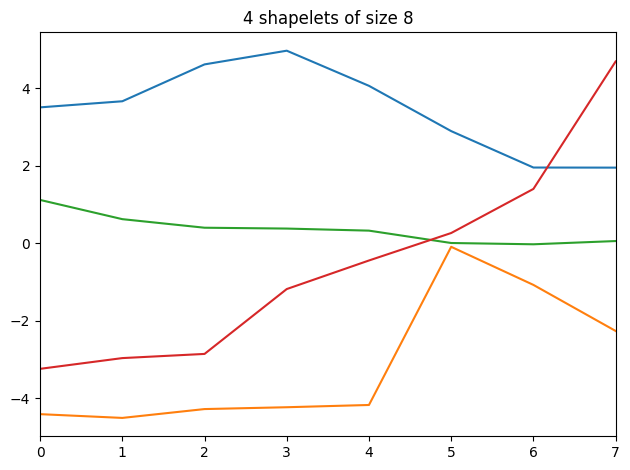

In [ ]:
# Plot the different discovered shapelets
plt.figure()
for i, sz in enumerate(n_shapelets_per_size.keys()):
    plt.subplot(len(n_shapelets_per_size), 1, i + 1)
    plt.title("%d shapelets of size %d" % (n_shapelets_per_size[sz], sz))
    for shp in shp_clf.shapelets_:
        if ts_size(shp) == sz:
            plt.plot(shp.ravel())
    plt.xlim([0, max(n_shapelets_per_size.keys()) - 1])

plt.tight_layout()
plt.show()

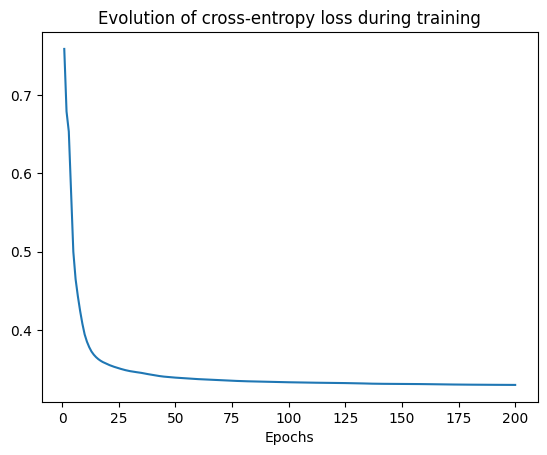

In [ ]:

# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

<ipython-input-12-38a345a5ed3a>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LearningShapelets or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

(1017, 4)
Varianza acumulada de las dos primeras componentes: 0.8728


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


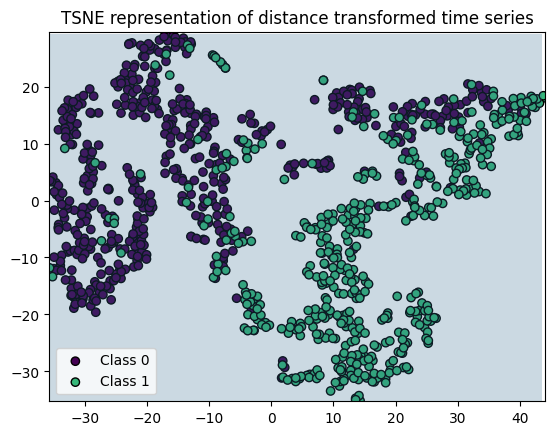

In [ ]:
viridis = cm.get_cmap('viridis', 4)

# We will plot our distances in a 2D space
distances = shp_clf.transform(X_train)
weights, biases = shp_clf.get_weights('classification')
print(distances.shape) # 1017x4

# Realizamos la transformación con PCA
pca = PCA(n_components=2)  # Queremos reducir a 2 dimensiones
distances_pca = pca.fit_transform(distances)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.sum(explained_variance)
print(f"Varianza acumulada de las dos primeras componentes: {cumulative_variance:.4f}")

# Reducimos las distancias a 2 dimensiones con t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
distances_tsne = tsne.fit_transform(distances)



# Scatter plot
distances = distances_tsne
for i, y in enumerate(np.unique(y_train)):
    plt.scatter(distances[y_train == y, 0],
                distances[y_train == y, 1],
                c=[viridis(i / len(np.unique(y_train)))] * np.sum(y_train == y),
                edgecolors='k',
                label=f'Class {y}')

# Create a meshgrid of the decision boundaries
xmin = np.min(distances[:, 0]) - 0.1
xmax = np.max(distances[:, 0]) + 0.1
ymin = np.min(distances[:, 1]) - 0.1
ymax = np.max(distances[:, 1]) + 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin)/200),
                        np.arange(ymin, ymax, (ymax - ymin)/200))
Z = []
for x, y in np.c_[xx.ravel(), yy.ravel()]:
    for i in range(len(biases)):
      Z.append(np.argmax(biases[i] + weights[0][i]*x + weights[1][i]*y))
Z = np.array(Z).reshape(xx.shape)
cs = plt.contourf(xx, yy, Z / 3, cmap=viridis, alpha=0.25)

plt.legend()
# plt.xlabel('$d(\mathbf{x}, \mathbf{s}_1)$')
# plt.ylabel('$d(\mathbf{x}, \mathbf{s}_2)$')
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.title('TSNE representation of distance transformed time series')
plt.show()

<ipython-input-53-84651192b405>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LearningShapelets or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

(1017, 4)


Text(0.5, 1.0, 'TSNE representation of distance transformed time series')

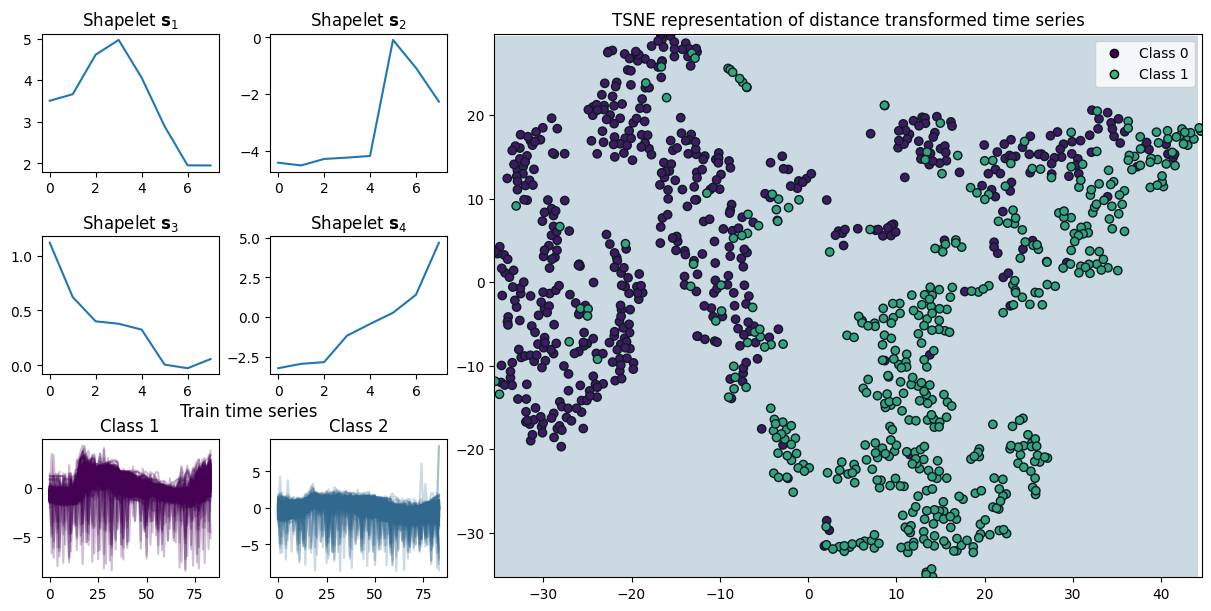

In [ ]:
# Create a grid for our two shapelets on the left and distances on the right
viridis = cm.get_cmap('viridis', 4)
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(3, 12)
fig_ax1   = fig.add_subplot(gs[0, :2])
fig_ax2   = fig.add_subplot(gs[0, 2:4])
fig_ax3   = fig.add_subplot(gs[1, :2])
fig_ax4   = fig.add_subplot(gs[1, 2:4])
fig_ax5a  = fig.add_subplot(gs[2, :2])
fig_ax5b  = fig.add_subplot(gs[2, 2:4])
fig_ax6   = fig.add_subplot(gs[:, 4:])


len(shp_clf.shapelets_)

# Plot our four shapelets on the left side
fig_ax1.plot(shp_clf.shapelets_[0])
fig_ax1.set_title('Shapelet $\mathbf{s}_1$')
fig_ax2.plot(shp_clf.shapelets_[1])
fig_ax2.set_title('Shapelet $\mathbf{s}_2$')
fig_ax3.plot(shp_clf.shapelets_[2])
fig_ax3.set_title('Shapelet $\mathbf{s}_3$')
fig_ax4.plot(shp_clf.shapelets_[3])
fig_ax4.set_title('Shapelet $\mathbf{s}_4$')


# Create the time series of each class
for i, subfig in enumerate([fig_ax5a, fig_ax5b]):
    for k, ts in enumerate(X_train[y_train == i]):
        subfig.plot(ts.flatten(), c=viridis(i / 3), alpha=0.25)
        subfig.set_title('Class {}'.format(i + 1))
fig.text(x=.145, y=.315, s='Train time series', fontsize=12)


# We will plot our distances in a 2D space
# Reducimos las distancias a 2 dimensiones con t-SNE
distances = shp_clf.transform(X_train)
weights, biases = shp_clf.get_weights('classification')
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
distances_tsne = tsne.fit_transform(distances)
print(distances.shape) # 1017x4
distances = distances_tsne

# Scatter plot
for i, y in enumerate(np.unique(y_train)):
    fig_ax6.scatter(distances[y_train == y, 0],
                distances[y_train == y, 1],
                c=[viridis(i / len(np.unique(y_train)))] * np.sum(y_train == y),
                edgecolors='k',
                label=f'Class {y}')

# Create a meshgrid of the decision boundaries
xmin = np.min(distances[:, 0]) - 0.1
xmax = np.max(distances[:, 0]) + 0.1
ymin = np.min(distances[:, 1]) - 0.1
ymax = np.max(distances[:, 1]) + 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin)/200),
                        np.arange(ymin, ymax, (ymax - ymin)/200))
Z = []
for x, y in np.c_[xx.ravel(), yy.ravel()]:
    for i in range(len(biases)):
      Z.append(np.argmax(biases[i] + weights[0][i]*x + weights[1][i]*y))
Z = np.array(Z).reshape(xx.shape)
cs = fig_ax6.contourf(xx, yy, Z / 3, cmap=viridis, alpha=0.25)

fig_ax6.legend()
fig_ax6.set_xlim((xmin, xmax))
fig_ax6.set_ylim((ymin, ymax))
fig_ax6.set_title('TSNE representation of distance transformed time series')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LearningShapelets or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LearningShapelets or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appr

time series class: 0 | pred class: 0


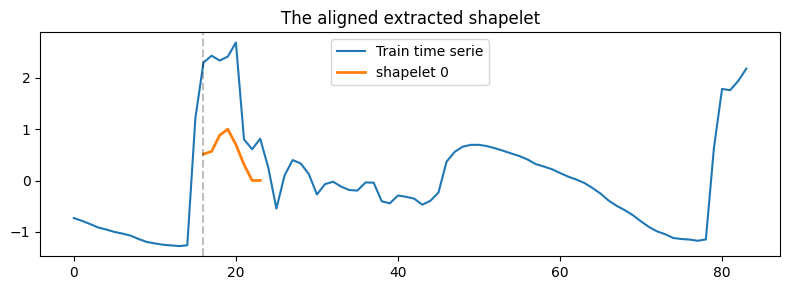

In [ ]:
n_shapelets = sum(n_shapelets_per_size.values())
distances = shp_clf.transform(X_train)
predicted_locations = shp_clf.locate(X_train)

f, ax = plt.subplots(1, figsize=(8, 3), sharex=True)
test_ts_id = np.argmin(np.sum(distances, axis=1))

test_ts_id = 0
shapelet_idx = 0

shap = shp_clf.shapelets_[shapelet_idx]
shap = TimeSeriesScalerMinMax().fit_transform(shap.reshape(1, -1, 1)).flatten()
pos = predicted_locations[test_ts_id, 0]
ax.plot(X_train[test_ts_id].ravel(), label = "Train time serie")
ax.plot(np.arange(pos, pos + len(shap)), shap, linewidth=2, label = f"shapelet {shapelet_idx}")
ax.axvline(pos, color='k', linestyle='--', alpha=0.25)
ax.set_title("The aligned extracted shapelet")

# We calculate the distances from the shapelet to the timeseries ourselves.
distances = []
time_series = X_train[test_ts_id].ravel()
print(f"time series class: {y_train[test_ts_id]} | pred class: {y_pred[test_ts_id]}")
for i in range(len(time_series) - len(shap)):
    distances.append(np.linalg.norm(time_series[i:i+len(shap)] - shap))
# ax[1].plot(distances)
# ax[1].axvline(np.argmin(distances), color='k', linestyle='--', alpha=0.25)
# ax[1].set_title('The distances between the time series and the shapelet')

plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
n_shapelets_per_size

{8: 4}